In [1]:
%matplotlib widget

In [2]:
import os, random, multiprocessing

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [98]:
# from sklearn.utils.testing import ignore_warnings

DATADIR = "data"
LCFILE = os.path.join(DATADIR, "plasticc_train_lightcurves.csv.gz")
LCS = pd.read_csv(LCFILE).set_index(["object_id"])

NBIN_X = 2048
NBIN_Y = 256

NBAND = 6

start_mod = 59580.0343
end_mod = 60674.363
binned_mod, binned_mod_step = np.linspace(start_mod, end_mod, NBIN_X, retstep=True)

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [102]:
def bin(df):
    return None


def plot_hist(matrix):
    return None


ids = LCS.index.unique().values

for test_id in ids[0:1]:
    
    lc_full = LCS.query("object_id == @test_id")
    
    flux_shift = abs(lc_full.flux.min())
    peak_flux = lc_full.flux.max() + flux_shift
    
    # shift flux to positive values
    lc_full.flux = lc_full.flux + flux_shift
    
    # discretize flux column
    y_val, y_step = np.linspace(lc_full.flux.min(), lc_full.flux.max(), NBIN_Y, retstep=True)
    
    grid_full = np.zeros((NBIN_Y, NBIN_X, NBAND))
    
    for passband in range(NBAND):
        
        test_id = 3489
        #passband = 5
        
        lc = lc_full.query("passband == @passband")
        
        # discretize flux column
        y_select = np.digitize(lc.flux, y_val) - 1
        
        # normalized gaussian
        flux_grey_val = np.zeros((NBIN_Y, len(lc)))
        for point, (mu, sig) in enumerate(zip(lc.flux.values, lc.flux_err.values)):
            flux_grey_val[:, point] = gaussian(y_val, mu, sig)
        
        # discretize mjd column
        x_select = np.digitize(lc.mjd.values, binned_mod)
        
        grid_full[y_select, x_select, passband] + 1
        print(len(x_select), len(y_select))

        pix_to_flux = peak_flux / NBIN_Y
        print(f"Peak flux: {peak_flux}")
        print(f"Flux increase per Pixel: {pix_to_flux}")

        bins = np.linspace(start=start_mod, stop=end_mod, num=NBIN_X) - start_mod

        hist = np.histogram2d(x=lc.mjd, y=lc.flux, bins=[NBIN_X, NBIN_Y])[0]

        k = 0
        for i in range(NBIN_X):
            column = hist[i, :]
            if np.sum(column) == 1:
                flux = lc.flux.values[k]
                err = lc.flux_err.values[k]
                normaldist = sts.norm(loc=flux, scale=err)
                for l in column:
                    if l == 1:
                        central_pixel = l
                k += 1

# fig, ax = plt.subplots()
# ax.hist2d(x=lc.mjd, y=lc.flux, bins=[NBIN_X, 256])
# fig.savefig("test.png")

63 63
Peak flux: 1761.066406
Flux increase per Pixel: 6.8791656484375
58 58
Peak flux: 1761.066406
Flux increase per Pixel: 6.8791656484375
58 58
Peak flux: 1761.066406
Flux increase per Pixel: 6.8791656484375
58 58
Peak flux: 1761.066406
Flux increase per Pixel: 6.8791656484375
58 58
Peak flux: 1761.066406
Flux increase per Pixel: 6.8791656484375
57 57
Peak flux: 1761.066406
Flux increase per Pixel: 6.8791656484375


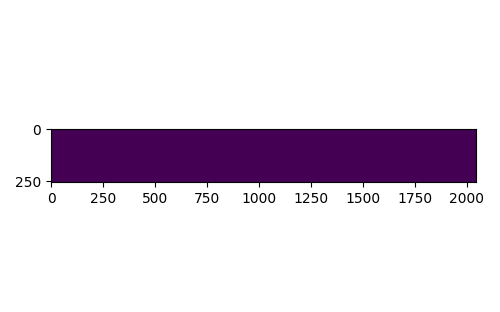

In [105]:
num = 3
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

ax.imshow(
    grid_full[:,:,5],
    #cmap="Greys"
)

In [63]:
NBIN_X

2048

In [57]:
select = np.digitize(lc.mjd.values,binned_mod)

In [58]:
img = np.zeros((NBIN_Y, NBIN_X))

In [59]:
img[:,select] = flux_grey_val

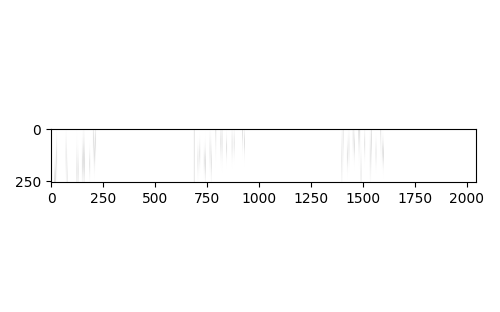

In [60]:
num = 4
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

ax.imshow(
    img,
    cmap="Greys"
)

In [64]:
img.shape

(256, 2048)